# 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/dataset/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.
* 처음으로 파일데이터에서 상권별 업종밀집통계정보를 다운로드 받아봅니다.

## 필요한 라이브러리 불러오기

In [1]:
# pandas, numpy, seaborn, matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 시각화를 위한 폰트 설정

In [3]:
# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## Google Colaboratory 사용을 위한 설정

In [0]:
# # 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic') 

In [0]:
# # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # PyDrive client 인증
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [0]:
# # 공유 가능한 링크로 파일 가져오기
# url = 'https://drive.google.com/open?id=1xvJs9ZxUHoBBAUXq1IWEaRXgcop8KjrT'
# id = url.split('=')[1]
# print(id)
# downloaded = drive.CreateFile({'id':id}) 
# # data 폴더에 파일을 관리하며, 폴더가 없다면 만들어서 파일을 관리하도록 한다.
# %mkdir data
# downloaded.GetContentFile('data/store_201906_01.csv')  

## 데이터 로드하기
* 판다스에서 데이터를 로드할 때는 read_csv를 사용합니다.
* 데이터를 로드해서 df라는 변수에 담습니다.
* 그리고 shape 를 통해 데이터의 갯수를 찍습니다. 결과는 (행, 열) 순으로 출력됩니다.

In [5]:
df = pd.read_csv("data/store_201906_01.csv")
df.shape

(565016, 39)

## 데이터 미리보기
* head, tail 을 통해 데이터를 미리 볼 수 있습니다.

In [17]:
# head 로 데이터를 미리보기 합니다.
# (Shift + tab + tab)
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
2,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
3,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [18]:
# tail 로 마지막 부분에 있는 데이터를 불러옵니다.
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
565011,16284103,서동수타짬뽕,NaN,Q,음식,Q02,중식,Q02A00,중국음식/중국집,I56112,...,2641011000102180001013127,NaN,부산광역시 금정구 서동중심로 14,609831,46328.0,NaN,NaN,NaN,129.104354,35.210961
565012,16282701,주방,NaN,Q,음식,Q02,중식,Q02A00,중국음식/중국집,I56112,...,1144012300100570138013520,NaN,서울특별시 마포구 월드컵로19길 42,121820,4012.0,NaN,2,NaN,126.907641,37.555677
565013,16283091,원클래스독서실,NaN,R,학문/교육,R10,도서관/독서실,R10A01,독서실,R90212,...,2626010800112480004011513,월드메디컬타워,부산광역시 동래구 아시아드대로 239-1,607841,47851.0,NaN,2,202,129.067468,35.205469
565014,16287899,에스에스엠,NaN,D,소매,D12,가전제품소매,D12A05,전화기판매,G47312,...,2638010300105220024033909,선경아트빌,부산광역시 사하구 낙동남로1367번길 16,604853,49314.0,NaN,NaN,101,128.961386,35.107213
565015,16286754,천사통신,NaN,D,소매,D12,가전제품소매,D12A05,전화기판매,G47312,...,2614011800100170005012010,NaN,부산광역시 서구 구덕로124번길 27,602055,49246.0,NaN,NaN,NaN,129.022555,35.097951


In [19]:
# info로 데이터의 요약을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565016 entries, 0 to 565015
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     565016 non-null  int64  
 1   상호명        565015 non-null  object 
 2   지점명        75524 non-null   object 
 3   상권업종대분류코드  565016 non-null  object 
 4   상권업종대분류명   565016 non-null  object 
 5   상권업종중분류코드  565016 non-null  object 
 6   상권업종중분류명   565016 non-null  object 
 7   상권업종소분류코드  565016 non-null  object 
 8   상권업종소분류명   565016 non-null  object 
 9   표준산업분류코드   532064 non-null  object 
 10  표준산업분류명    532064 non-null  object 
 11  시도코드       565016 non-null  int64  
 12  시도명        565016 non-null  object 
 13  시군구코드      565016 non-null  int64  
 14  시군구명       565016 non-null  object 
 15  행정동코드      565016 non-null  int64  
 16  행정동명       565016 non-null  object 
 17  법정동코드      565016 non-null  int64  
 18  법정동명       565016 non-null  object 
 19  지번코드       565016 non-n

In [34]:
# 컬럼명만 출력해 봅니다.
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

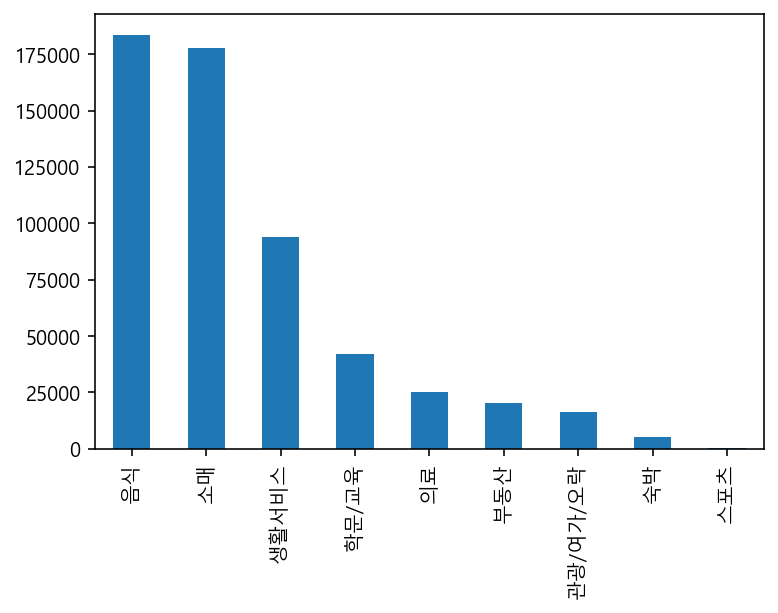

In [35]:
# value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.
df['상권업종대분류명'].value_counts().plot.bar()

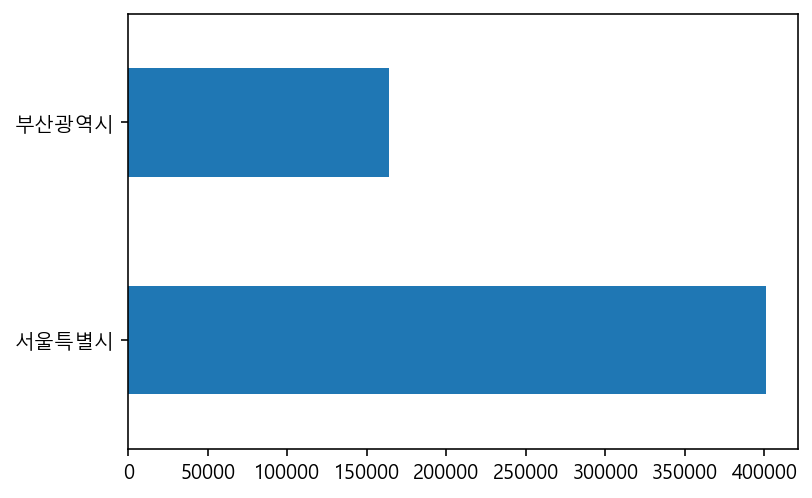

In [26]:
# Pandas 에는 plot기능을 내장하고 있습니다. 위에서 분석한 시도코드의 수를 막대그래프로 표현해 봅니다.
df["시도명"].value_counts().plot.barh()

In [37]:
# 위에서는 시도코드로 갯수를 세어봤지만 여기에서는 "시도명" 으로 갯수를 세어봅니다.
df["시도명"].describe()

count     565016
unique         2
top        서울특별시
freq      401071
Name: 시도명, dtype: object

In [ ]:
# "상권업종대분류명"으로 갯수를 세어봅니다.
df["상권업종대분류명"].unique()

In [42]:
df["상권업종대분류명"].unique().shape

(9,)

In [44]:
len(df["상권업종대분류명"].unique())

9

In [45]:
df["상권업종대분류명"].nunique()

9

In [50]:
# "상권업종대분류명"이 "의료"인 데이터만 가져와서 df_medical 이라는 변수에 담아봅니다.
# 그리고 head()를 통해 미리보기를 합니다.
df_medical = df[df["상권업종대분류명"] == "의료"].copy()
df_medical.shape

(25255, 39)

In [52]:
# describe 를 사용하면 데이터를 요약해 볼 수 있습니다.
# 기본적으로 수치형 데이터를 요약해서 보여줍니다.
# 데이터의 갯수, 평균, 표준편차, 최솟값, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.
df_medical[["경도", "위도"]].describe()

,경도,위도
count,25255.000000,25255.000000
mean,127.529230,36.939129
std,0.902615,1.037501
min,126.796353,35.048207
25%,126.981076,35.272877
50%,127.041290,37.514609
75%,128.960160,37.561322
max,129.282768,37.687105


In [60]:
# 카페정보를 가져오기 위해 "상권업종대분류명" 에서 "음식"만 가져옵니다.
# df.loc를 사용하면 행,열을 함께 가져올 수 있습니다.
# 이 기능을 통해 "상권업종중분류명" 만 가져옵니다. 
# 그리고 가져온 결과를 value_counts 를 통해 중분류의 갯수를 세어봅니다.
df[df["상권업종대분류명"] == "음식"]["상권업종중분류명"].head(1)

126 ms ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


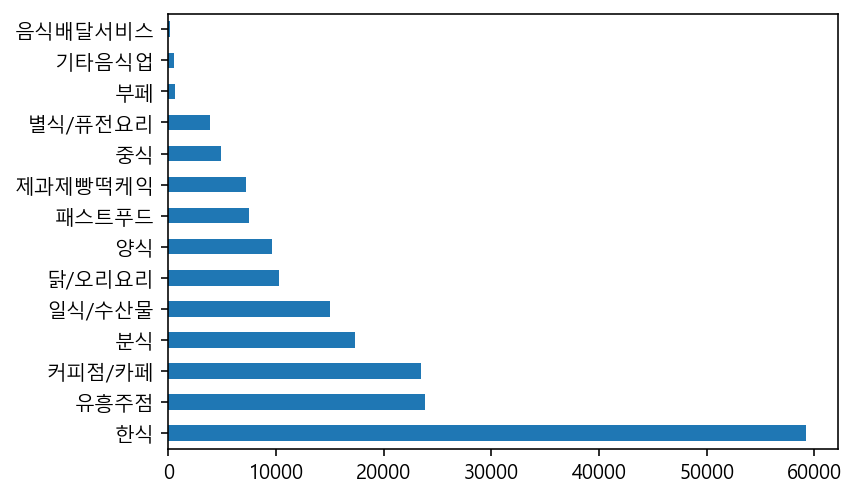

In [65]:
df_food = df.loc[df["상권업종대분류명"] == "음식", "상권업종중분류명"]
df_food.value_counts().plot.barh()

In [73]:
temp = df[df["상권업종대분류명"] == "의료"].copy()
temp.loc[temp["상권업종중분류명"] == "병원", "지역"] = "대한민국"

In [0]:
# 위와 똑같은 기능을 수행하는 코드입니다. 아래와 같이 한 줄에 표현할 수도 있습니다. 
# df.loc[df["상권업종대분류명"] == "음식", "상권업종중분류명"].value_counts()

In [81]:
# 커피점/카페만 따로 모아봅니다.
df_food = df[df["상권업종대분류명"] == "음식"].copy()
df_coffee = df_food[df_food["상권업종중분류명"] == "커피점/카페"].copy()
df_coffee.shape

(23513, 39)

In [86]:
# 상호명으로 갯수를 세어봅니다. 
# 가장 많은 상호 상위 10개를 출력해 봅니다.
df_coffee["상호명"].value_counts().head(10)

간단하지만특별한화피디Cafe    1482
이디야커피               538
스타벅스                370
투썸플레이스              165
커피빈                 153
엔제리너스               134
할리스커피               124
카페베네                110
탐앤탐스                109
커피베이                104
Name: 상호명, dtype: int64

In [91]:
# 서울에 있는 카페의 위도와 경도를 봅니다.
df_seoul = df_coffee[df_coffee["시도명"] == "서울특별시"].copy()
df_seoul[["위도","경도"]].describe()

,위도,경도
count,18651.000000,18651.000000
mean,37.541911,126.993093
std,0.045397,0.077060
min,37.434157,126.797102
25%,37.504827,126.928029
50%,37.539471,127.003132
75%,37.568276,127.049454
max,37.689203,127.176066


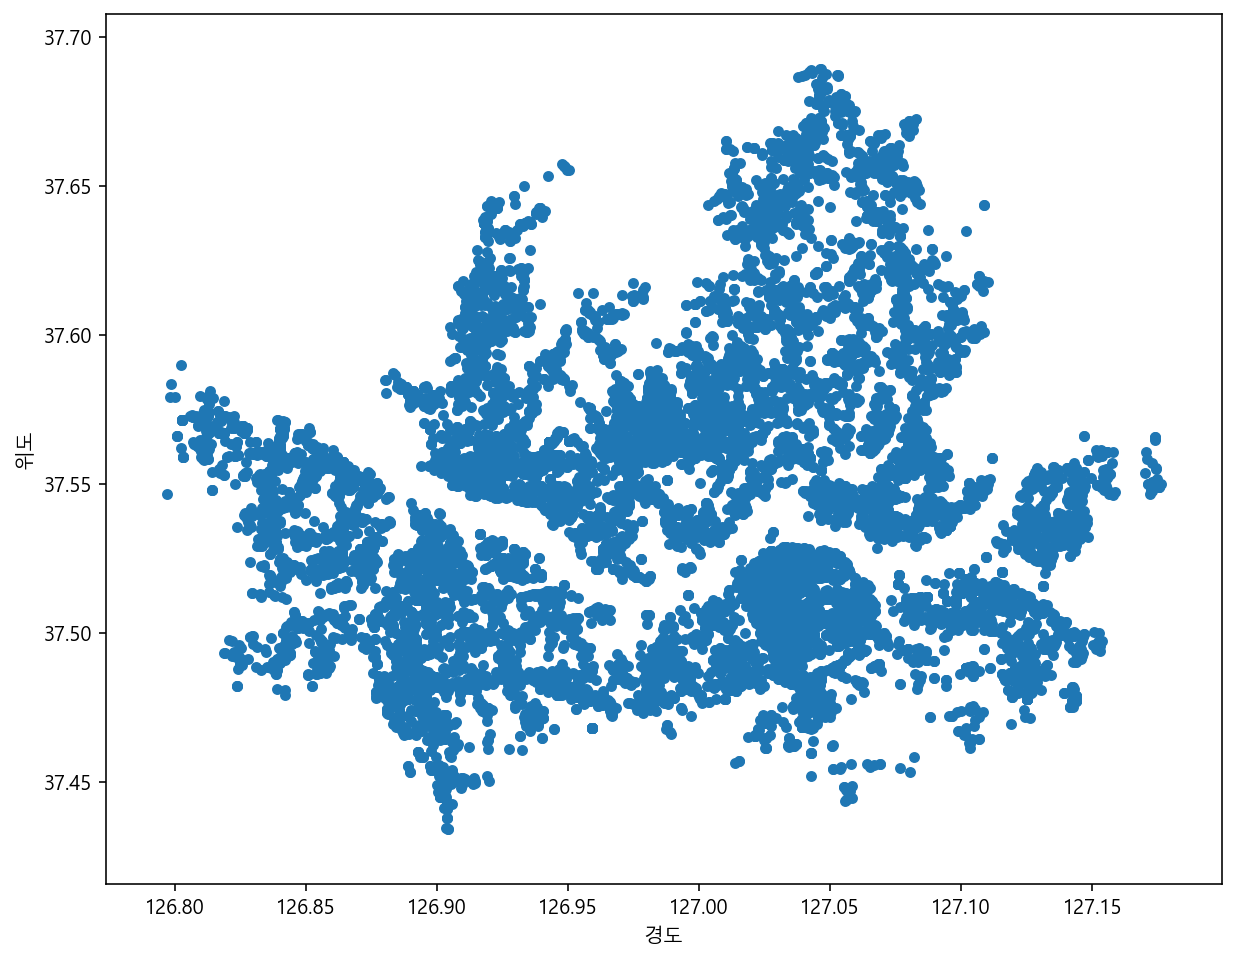

In [94]:
# Pandas 의 plot.scatter 를 통해 경도와 위도를 표시해 봅니다.
df_seoul[["위도", "경도"]].plot.scatter(
    x="경도", y="위도", figsize=(10,8))


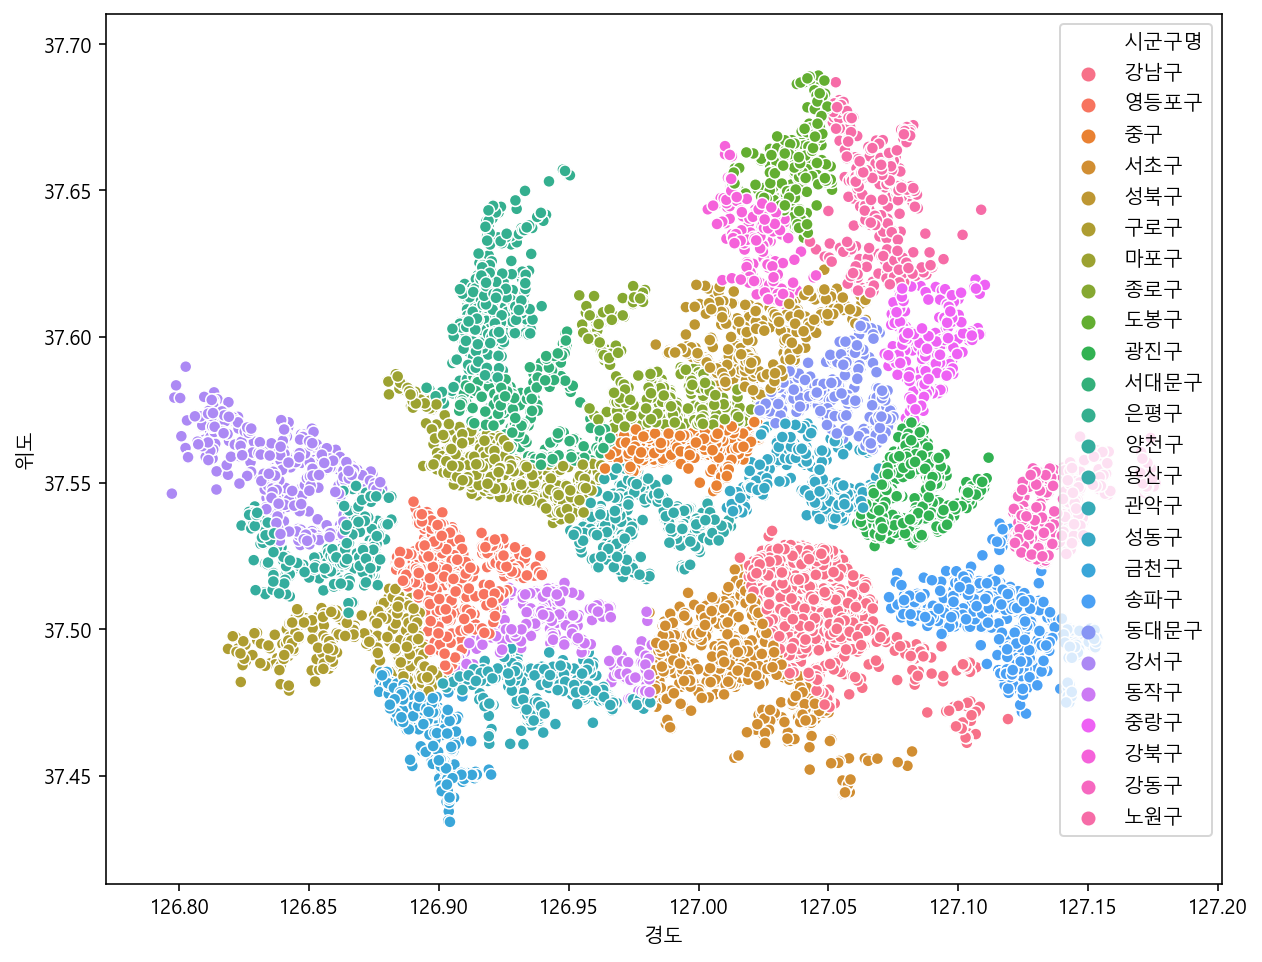

In [99]:
# seaborn의 scatterplot 을 통해 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="시군구명")